# ETAPE 6

In [326]:
import pandas as pd 
import warnings

warnings.filterwarnings('ignore')

In [327]:
data = pd.read_csv('data/train.csv')

In [328]:
titanic_df = data.copy()
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Vérification des données

In [329]:
titanic_df.columns = [x.lower() for x in data.columns]

In [330]:
titanic_df = titanic_df.drop(['passengerid', 'name', 'ticket', 'cabin'], axis = 1 )

In [331]:
for c in titanic_df.select_dtypes('object') : 
    print (f'{c:-<50} {titanic_df[c].unique()}')

sex----------------------------------------------- ['male' 'female']
embarked------------------------------------------ ['S' 'C' 'Q' nan]


In [332]:

# suppresion des lignes avec une valeure manquante et encodage

titanic_df = titanic_df.dropna(axis = 0)
titanic_df['sex'] = titanic_df['sex'].map({'male' : 1, 'female' : 0})
titanic_df['label_age'] = titanic_df['age'].apply(lambda x: 1 if x >= 16 else 0)
titanic_df['embarked'] = titanic_df['embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})
#titanic_df['cabin'] = titanic_df['cabin'].apply(lambda x: 1 if type(x) == str else 0)

titanic_df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,label_age
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,1


In [333]:
#def mineur(row):
#    if row['age'] >= 60:
#       return 3
#    elif row['age'] > 18:
#        return 2
#    elif row['age'] > 8:
#        return 1
#    else :
#        return 0

#titanic_df['cat'] = titanic_df.apply(mineur, axis = 1)
#titanic_df.head(3)

# Séparation train/test

In [334]:
X = titanic_df.drop('survived', axis = 1)
y = titanic_df['survived']

In [335]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [336]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

#scaler = MinMaxScaler()
scaler = StandardScaler()
titanic_scaler = scaler.fit_transform(titanic_df)

# Mon premier modèle : SVC

In [337]:
param_grid = {'C':[0.1,1,10],
              'gamma':[0.1, 1, 10], 
              'kernel':['linear','rbf']}

In [338]:
# Gridshearch
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train, y_train)
grid.best_estimator_

SVC(C=0.1, gamma=0.1, kernel='linear')

In [339]:
predict = grid.predict(X_test)

# Analyse de l'efficacité de mon modèle

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       107
           1       0.70      0.66      0.68        71

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



<AxesSubplot: >

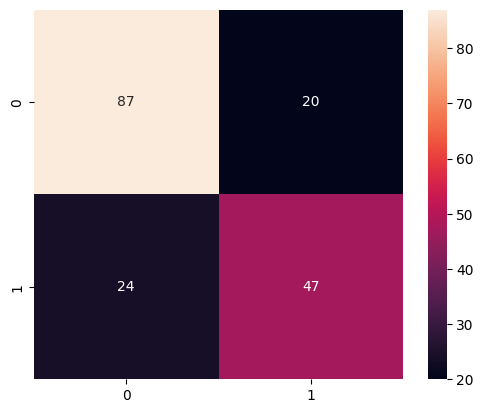

In [340]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print(classification_report(y_test, predict))

matrix = confusion_matrix(y_test, predict)
sns.heatmap(matrix, square = True, annot = True)

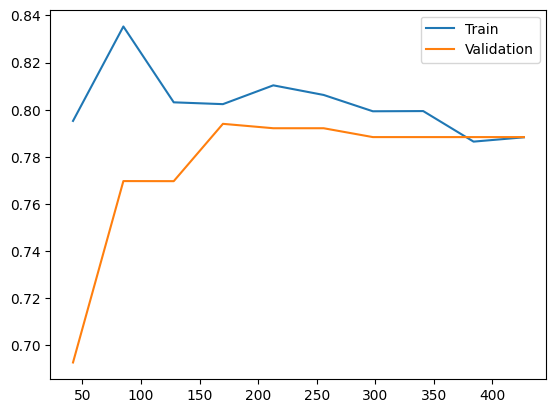

In [341]:

# learning curve
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(grid.best_estimator_, X_train, y_train, cv=5, train_sizes = np.linspace(0.1, 1, 10))
plt.plot(train_sizes,np.mean(train_scores, axis = 1), label = 'Train')
plt.plot(train_sizes, np.mean(test_scores, axis = 1), label = 'Validation')
plt.title('Learning-Curve')
plt.legend()
plt.show()

# Mon modèle deuxième : RandomForest

In [342]:
from sklearn.ensemble import RandomForestClassifier

In [344]:
# Gridsearch
param_grid1 = {'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 50, 100, 150 ]}

grid1 =GridSearchCV(RandomForestClassifier(),param_grid1, refit=True)
grid1.fit(X_train, y_train)
grid1.best_estimator_

RandomForestClassifier(n_estimators=50)

In [345]:
predict1 = grid1.predict(X_test)

# Analyse de l'efficacité de mon modèle

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       107
           1       0.71      0.73      0.72        71

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



<AxesSubplot: >

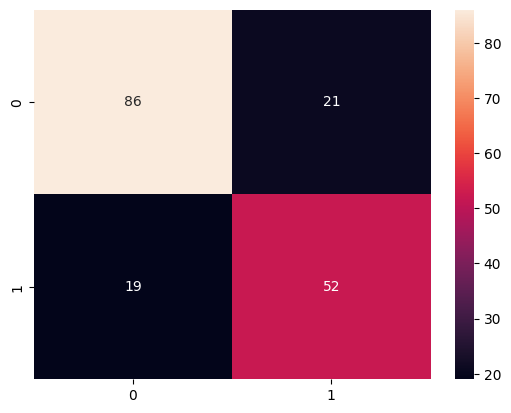

In [346]:
# Matrice de confusion 
print(classification_report(y_test, predict1))

sns.heatmap(confusion_matrix(y_test, predict1), annot = True, fmt = "")

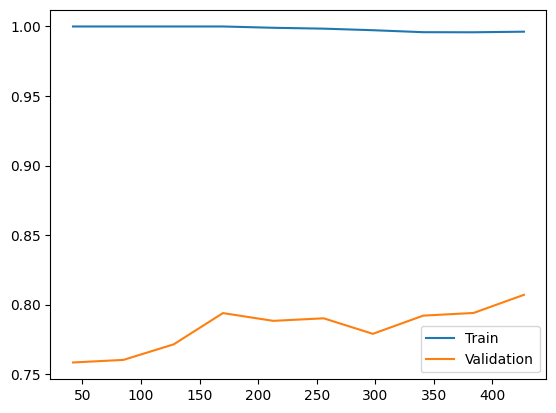

In [347]:
# Learning-curve
train_sizes, train_scores, test_scores = learning_curve(grid1.best_estimator_, X_train, y_train, cv=5, train_sizes = np.linspace(0.1, 1, 10))
plt.plot(train_sizes,np.mean(train_scores, axis = 1), label = 'Train')
plt.plot(train_sizes, np.mean(test_scores, axis = 1), label = 'Validation')
plt.title('Learning-Curve')
plt.legend()
plt.show()

<AxesSubplot: >

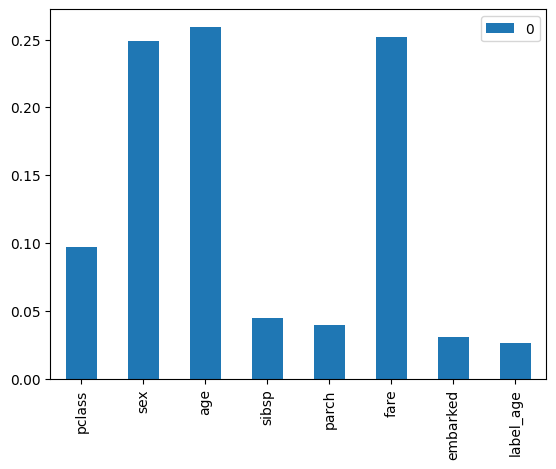

In [348]:
# Analyse des variables les moins pertinentes pour l'algorythme 
pd.DataFrame(rf_titanic.feature_importances_, index = X_train.columns).plot.bar()

# Pipeline

In [349]:
titanic = data.copy()
titanic.columns = [x.lower() for x in data.columns]
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [350]:
X = titanic.drop(['survived', 'cabin', 'ticket', 'name'], axis =1)
y = titanic['survived']
X.head()

,passengerid,pclass,sex,age,sibsp,parch,fare,embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Mes pipelines

In [299]:
from sklearn.compose import make_column_selector

numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

In [381]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(categorical_pipeline, categorical_features))
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8a58d71780>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8a58e9d300>)])

In [301]:
# initialisaiton de la pipeline 
model = make_pipeline(preprocessor, SVC())
model.fit(X_train, y_train)
predict_model = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       135
           1       0.78      0.65      0.71        88

    accuracy                           0.79       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.79      0.79      0.78       223

[[119  16]
 [ 31  57]]


<AxesSubplot: >

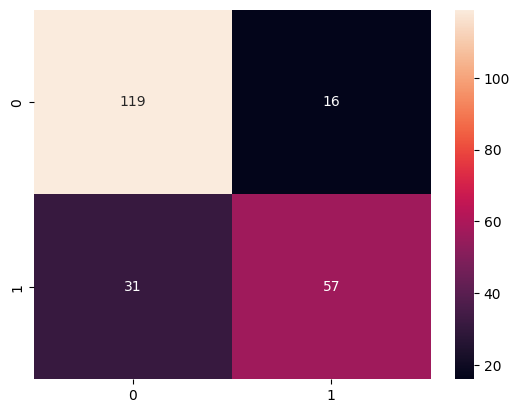

In [302]:
# classification et matrice de confusion du modèle
print(classification_report(y_test, predict_model))
print(confusion_matrix(y_test, predict_model))
sns.heatmap(confusion_matrix(y_test, predict_model), annot = True, fmt = "")

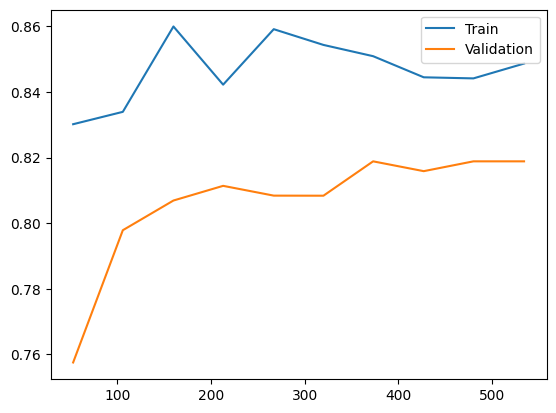

In [304]:
# learning-curve du modèle
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, train_sizes = np.linspace(0.1, 1, 10))
plt.plot(train_sizes,np.mean(train_scores, axis = 1), label = 'Train')
plt.plot(train_sizes, np.mean(test_scores, axis = 1), label = 'Validation')
plt.title('Learning-Curve')
plt.legend()
plt.show()

## Gridsearch de pipeline

In [307]:
# recherche des hyperparamètres de la pipeline
param_grid2 = {'svc__C':[0.1,1,10],
              'svc__gamma':[0.1, 1, 10], 
              'svc__kernel':['linear','rbf']}


grid2 = GridSearchCV(model, param_grid2)
grid2.fit(X_train, y_train)
grid2.best_params_


{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       135
           1       0.79      0.68      0.73        88

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



<AxesSubplot: >

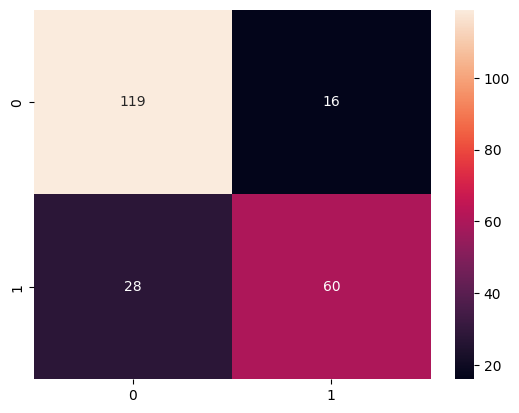

In [308]:
# Insertion des hyper-paramètres puis matrice de confusion

predict2 = grid.predict(X_test)

print(classification_report(y_test, predict2))
sns.heatmap(confusion_matrix(y_test, predict2), annot = True, fmt = "")

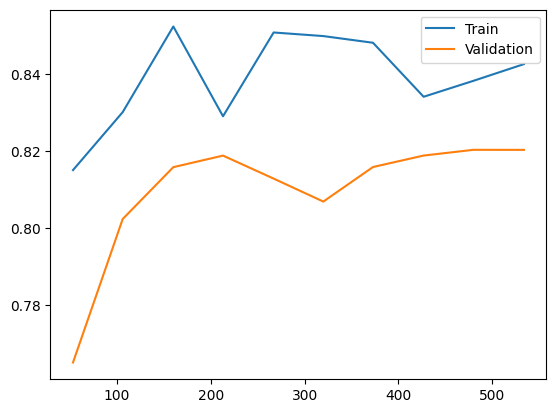

In [310]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(grid.best_estimator_, X_train, y_train, train_sizes = np.linspace(0.1, 1, 10))
plt.plot(train_sizes,np.mean(train_scores, axis = 1), label = 'Train')
plt.plot(train_sizes, np.mean(test_scores, axis = 1), label = 'Validation')
plt.title('Learning-Curve')
plt.legend()
plt.show()

# Test de plusieurs algorithmes

SVC {'SVC__C': 10, 'SVC__gamma': 0.1, 'SVC__kernel': 'rbf'}


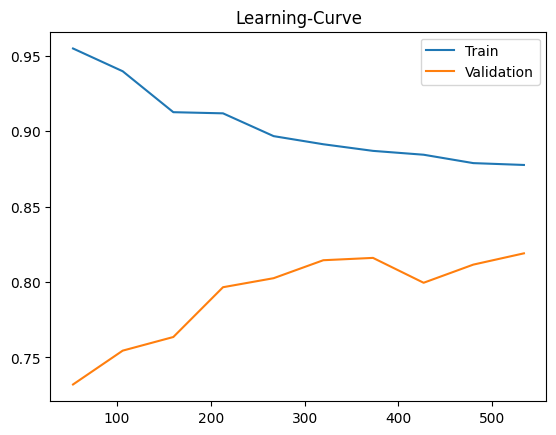

knn {'knn__leaf_size': 10, 'knn__n_neighbors': 23}


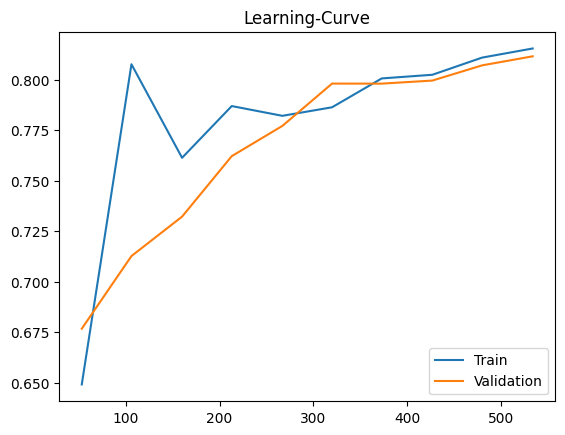

RF {'RF__bootstrap': True, 'RF__max_features': 'auto', 'RF__n_estimators': 50}


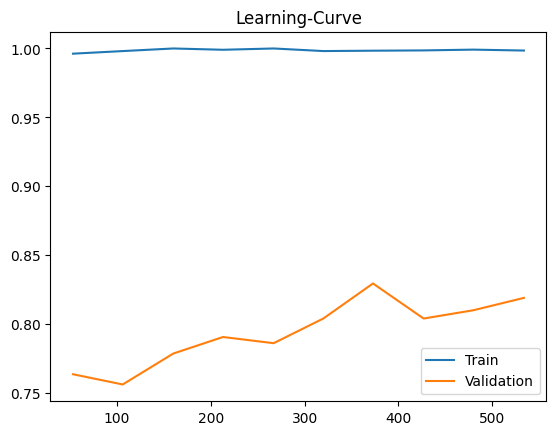

In [388]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

list_SVC = {'SVC__C' : [0.1,1,10],
        'SVC__gamma' : [0.1, 1, 10], 
        'SVC__kernel' : ['linear','rbf']}

list_KNeighborsClassifier = {'knn__n_neighbors' : range(1,30),
                'knn__leaf_size' : [10, 20, 30, 40, 50]}

list_RandomForestClassifier = {'RF__bootstrap': [True, False],
                'RF__max_features': ['auto', 'sqrt'],
                'RF__n_estimators': [10, 50, 100, 150 ]}


list_modele = [("SVC", SVC()), ("knn", KNeighborsClassifier()), ("RF", RandomForestClassifier())]
list_param = [list_SVC, list_KNeighborsClassifier, list_RandomForestClassifier]

for i, j in zip(list_modele, list_param) : 
        
        model = Pipeline(steps=[("prepro",preprocessor), (i)])
        # model = Pipeline(steps=[("prepro",preprocessor), (i[0],i[1])])
        # model.fit(X_train, y_train)
        
        grid3 = GridSearchCV(model, j)
        grid3.fit(X_train, y_train)
        predict_model = grid3.predict(X_test)

        print(i[0], grid3.best_params_)
        train_sizes, train_scores, test_scores = learning_curve(grid3.best_estimator_, X_train, y_train, train_sizes = np.linspace(0.1, 1, 10))
        plt.plot(train_sizes,np.mean(train_scores, axis = 1), label = 'Train')
        plt.plot(train_sizes, np.mean(test_scores, axis = 1), label = 'Validation')
        plt.title('Learning-Curve')
        plt.legend()
        plt.show()
        

        

